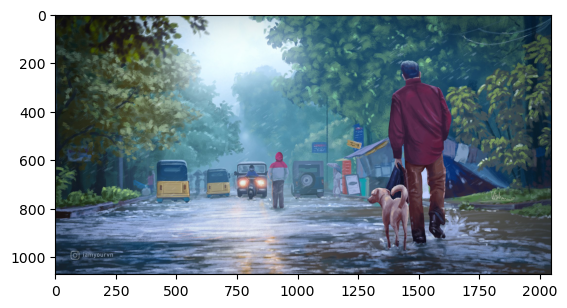

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img=cv2.imread('anbesivam.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [4]:
rows,cols,channels=img.shape

### Translation

Text(0.5, 1.0, 'Translated image')

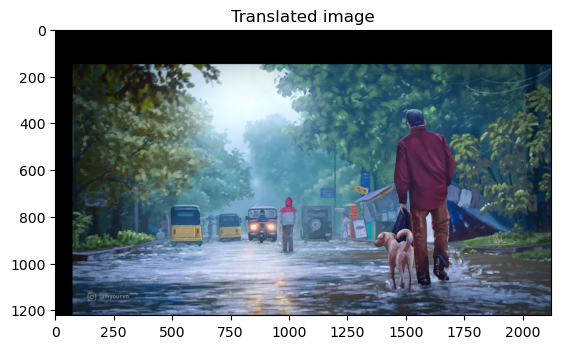

In [5]:
    tx = 75 
    ty = 150

   
    new_rows = rows + ty  
    new_cols = cols + tx 

  
    dst = np.zeros((new_rows, new_cols, channels), dtype=np.uint8)

    for i in range(rows):
        for j in range(cols):
          
            new_i = i + ty
            new_j = j + tx

          
            if 0 <= new_i < new_rows and 0 <= new_j < new_cols:
                dst[new_i, new_j] = img[i, j]

    plt.imshow(dst)
    plt.title('Translated image')

In [7]:
img.shape


(1072, 2048, 3)

In [8]:
dst.shape

(1222, 2123, 3)

### Reflection

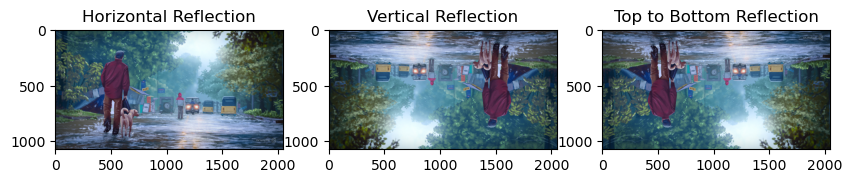

In [12]:
    reflected_horizontal = np.zeros_like(img)
    reflected_vertical = np.zeros_like(img)
    reflected_top_bottom = np.zeros_like(img)
    reflected_left_right = np.zeros_like(img)

  
    for i in range(rows):
        for j in range(cols):
            reflected_horizontal[i, j] = img[i, cols - j - 1]

 
    for i in range(rows):
        for j in range(cols):
            reflected_vertical[i, j] = img[rows - i - 1, j]

   
    for i in range(rows):
        for j in range(cols):
            reflected_top_bottom[i, j] = img[rows - i - 1, cols - j - 1]

    
    for i in range(rows):
        for j in range(cols):
            reflected_left_right[i, j] = img[i, cols - j - 1]
            
    plt.figure(figsize=(10, 10))

    plt.subplot(3, 3, 1)
    plt.imshow(reflected_horizontal)
    plt.title("Horizontal Reflection")

    plt.subplot(3, 3, 2)
    plt.imshow(reflected_vertical)
    plt.title("Vertical Reflection")

    plt.subplot(3, 3, 3)
    plt.imshow(reflected_top_bottom)
    plt.title("Top to Bottom Reflection")

    
    plt.show()

### Rotation

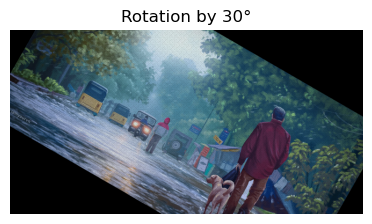

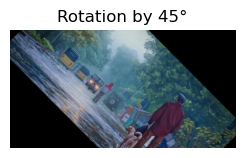

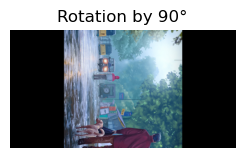

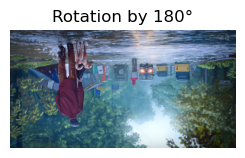

In [16]:
import math


def rotate_image(img, angle):
  
    rows, cols, channels = img.shape
    angle_rad = np.deg2rad(angle)
    rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
                                [np.sin(angle_rad), np.cos(angle_rad)]])
    center_x, center_y = cols // 2, rows // 2
    rotated_img = np.zeros_like(img)

    for i in range(rows):
        for j in range(cols):
            x_shifted = j - center_x
            y_shifted = i - center_y
            x_new, y_new = np.dot(rotation_matrix, [x_shifted, y_shifted])
            x_new, y_new = int(x_new + center_x), int(y_new + center_y)
            if 0 <= x_new < cols and 0 <= y_new < rows:
                rotated_img[y_new, x_new] = img[i, j]

    return rotated_img

angles = [30, 45, 90, 180]
plt.figure(figsize=(10, 10))

for i, angle in enumerate(angles):
    rotated = rotate_image(img, angle)
    plt.subplot(2, 2, i+1)
    plt.imshow(rotated)  
    plt.title(f"Rotation by {angle}°")
    plt.axis('off')

    plt.show()


### Scaling

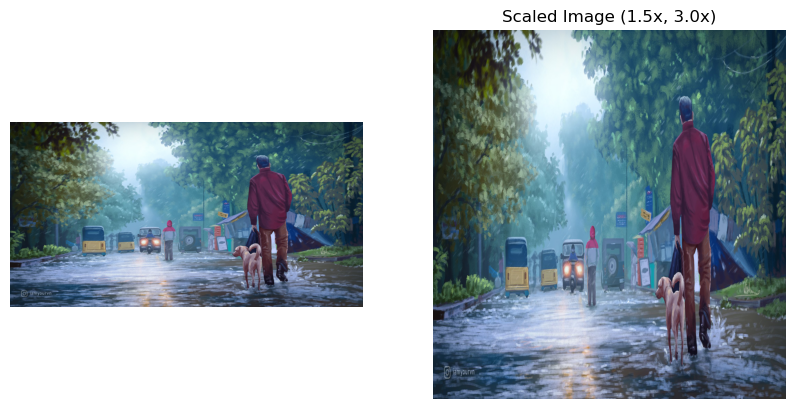

In [26]:
def scale_image(img, scale_x, scale_y):
    rows, cols, channels = img.shape
    new_rows = int(rows * scale_y)
    new_cols = int(cols * scale_x)
    scaled_img = np.zeros((new_rows, new_cols, channels), dtype=np.uint8)
    
    for i in range(new_rows):
        for j in range(new_cols):
            original_x = int(j / scale_x)
            original_y = int(i / scale_y)
            if original_x < cols and original_y < rows:
                scaled_img[i, j] = img[original_y, original_x]
    
    return scaled_img

scale_x = 1.5
scale_y = 3.0

scaled_img = scale_image(img, scale_x, scale_y)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(scaled_img)
plt.title(f"Scaled Image ({scale_x}x, {scale_y}x)")
plt.axis('off')

plt.show()


### Shearing


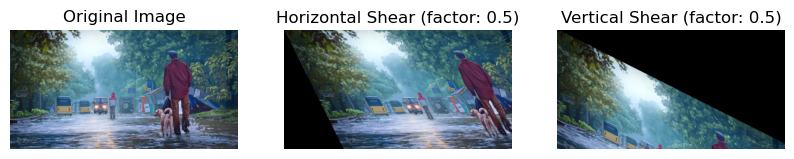

In [29]:
    shear_factor_x = 0.5  
    shear_factor_y = 0.5  
    sheared_img_x = np.zeros_like(img)  
    sheared_img_y = np.zeros_like(img) 
    for i in range(rows):
        for j in range(cols):
            new_x = int(j + shear_factor_x * i)
            new_y = i
            if 0 <= new_x < cols and 0 <= new_y < rows:
                sheared_img_x[new_y, new_x] = img[i, j]
    for i in range(rows):
        for j in range(cols):
            new_x = j
            new_y = int(i + shear_factor_y * j)
            if 0 <= new_x < cols and 0 <= new_y < rows:
                sheared_img_y[new_y, new_x] = img[i, j]
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(img) 
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(sheared_img_x)  
    plt.title(f"Horizontal Shear (factor: {shear_factor_x})")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(sheared_img_y)
    plt.title(f"Vertical Shear (factor: {shear_factor_y})")
    plt.axis('off')
    plt.show()
